In [8]:
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import logging
logging.getLogger().setLevel(logging.DEBUG)

In [22]:
from torchsummary import summary
import torch
use_cuda=torch.cuda.is_available()
import pytorch
from pytorch import dataset as ptd

import os
import datasets
import pytorch_models
import torch.optim as optim
dataset_name="lsa16"
(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset_name)
dataset=ptd.ClassificationDataset(dataset_name,x_train,x_test,y_train,y_test,num_classes,input_shape)

print('x_train shape:', x_train.shape,x_train.dtype)
print('x_test shape:', x_test.shape,x_test.dtype)
print('y_train shape:', y_train.shape,y_train.dtype)
print('y_test shape:', y_test.shape,y_test.dtype)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


import numpy as np
print(np.unique(y_train.argmax(axis=1)))
print(y_train.min(),y_train.max())


Loading images from /home/facundo/.keras/datasets/lsa16/lsa32x32_nr_rgb_black_background/images


/home/facundo/.python/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


x_train shape: (720, 32, 32, 3) uint8
x_test shape: (80, 32, 32, 3) uint8
y_train shape: (720, 16) float64
y_test shape: (80, 16) float64
720 train samples
80 test samples
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
0.0 1.0


In [23]:
from pytorch import training

import pytorch_models

conv_filters={"mnist":32,"mnist_rot":32,"cifar10":64,"fashion_mnist":64,"lsa16":32}
fc_filters={"mnist":64,"mnist_rot":64,"cifar10":128,"fashion_mnist":128,"lsa16":64}
model = pytorch_models.SimpleConv(input_shape,num_classes,
                                 conv_filters=conv_filters[dataset.name],fc_filters=fc_filters[dataset.name])
#model= pytorch_models.FFNet(input_shape,num_classes)x
if use_cuda:
    model=model.cuda()
parameters=training.add_weight_decay(model.named_parameters(),1e-9)
optimizer = optim.Adam(parameters, lr=0.001)
print(model)

rotated_model= pytorch_models.SimpleConv(input_shape,num_classes,
                                       conv_filters=conv_filters[dataset.name],fc_filters=fc_filters[dataset.name])
if use_cuda:
    rotated_model= rotated_model.cuda()
rotated_parameters=training.add_weight_decay(rotated_model.named_parameters(),1e-9)
rotated_optimizer = optim.Adam(rotated_parameters, lr=0.001)

print(rotated_model)
#summary(model, input_size=[1,28,28])


SimpleConv(
  (conv): SequentialWithIntermediates(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
  )
  (fc): SequentialWithIntermediates(
    (0): Linear(in_features=8192, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
  )
)
SimpleConv(
  (conv): SequentialWithIntermediates(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(

Training model with unrotated dataset...


Epoch 1: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 2.2273, Accuracy: 28.75% (23/80)


Epoch 2: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.3342, Accuracy: 56.25% (45/80)


Epoch 3: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.2110, Accuracy: 67.50% (54/80)


Epoch 4: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 0.9668, Accuracy: 76.25% (61/80)


Epoch 5: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.0969, Accuracy: 75.00% (60/80)


Epoch 6: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 0.9659, Accuracy: 77.50% (62/80)


Epoch 7: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.3756, Accuracy: 73.75% (59/80)


Epoch 8: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.0545, Accuracy: 81.25% (65/80)


Epoch 9: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 0.9203, Accuracy: 82.50% (66/80)


Epoch 10: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.3641, Accuracy: 82.50% (66/80)


Epoch 11: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.0455, Accuracy: 82.50% (66/80)


Epoch 12: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.2324, Accuracy: 78.75% (63/80)


Epoch 13: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 0.9779, Accuracy: 83.75% (67/80)


Epoch 14: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.1010, Accuracy: 82.50% (66/80)


Epoch 15: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.0582, Accuracy: 82.50% (66/80)


Epoch 16: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.2174, Accuracy: 80.00% (64/80)


Epoch 17: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.2552, Accuracy: 81.25% (65/80)


Epoch 18: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.2659, Accuracy: 83.75% (67/80)


Epoch 19: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.2905, Accuracy: 81.25% (65/80)


Epoch 20: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.2894, Accuracy: 83.75% (67/80)


Epoch 21: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.4134, Accuracy: 81.25% (65/80)


Epoch 22: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.4516, Accuracy: 80.00% (64/80)


Epoch 23: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.4769, Accuracy: 80.00% (64/80)


Epoch 24: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.5103, Accuracy: 80.00% (64/80)


Epoch 25: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.5322, Accuracy: 81.25% (65/80)


Epoch 26: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.5591, Accuracy: 80.00% (64/80)


Epoch 27: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.5836, Accuracy: 80.00% (64/80)


Epoch 28: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.6067, Accuracy: 81.25% (65/80)


Epoch 29: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.6134, Accuracy: 82.50% (66/80)


Epoch 30: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.6511, Accuracy: 81.25% (65/80)


Epoch 31: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.6683, Accuracy: 81.25% (65/80)


Epoch 32: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.6826, Accuracy: 81.25% (65/80)


Epoch 33: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.6919, Accuracy: 82.50% (66/80)


Epoch 34: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.7052, Accuracy: 82.50% (66/80)


Epoch 35: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.7224, Accuracy: 81.25% (65/80)


Epoch 36: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.7432, Accuracy: 81.25% (65/80)


Epoch 37: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.7486, Accuracy: 82.50% (66/80)


Epoch 38: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.7625, Accuracy: 82.50% (66/80)


Epoch 39: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.7786, Accuracy: 82.50% (66/80)


Epoch 40: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.7910, Accuracy: 82.50% (66/80)


Epoch 41: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.8062, Accuracy: 82.50% (66/80)


Epoch 42: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.8172, Accuracy: 81.25% (65/80)


Epoch 43: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.8213, Accuracy: 82.50% (66/80)


Epoch 44: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.8370, Accuracy: 82.50% (66/80)


Epoch 45: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.8480, Accuracy: 82.50% (66/80)


Epoch 46: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.8606, Accuracy: 82.50% (66/80)


Epoch 47: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.8718, Accuracy: 82.50% (66/80)


Epoch 48: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.8839, Accuracy: 82.50% (66/80)


Epoch 49: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.8898, Accuracy: 82.50% (66/80)


Epoch 50: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.8992, Accuracy: 82.50% (66/80)


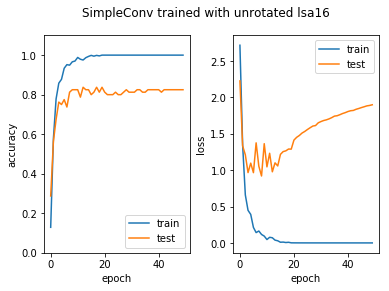

Skipping pretraining rotated model with unrotated dataset
Training rotated model with rotated dataset...


Epoch 1: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 2.7727, Accuracy: 7.50% (6/80)


Epoch 2: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 2.7476, Accuracy: 6.25% (5/80)


Epoch 3: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 2.6273, Accuracy: 15.00% (12/80)


Epoch 4: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 2.4734, Accuracy: 12.50% (10/80)


Epoch 5: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 2.2992, Accuracy: 22.50% (18/80)


Epoch 6: 100% (batch 12/12)  ==stats==> loss:   2.25, accuracy:  0.156, Time:  0:00:00


Test => Loss: 2.4311, Accuracy: 17.50% (14/80)


Epoch 7: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 2.2321, Accuracy: 18.75% (15/80)


Epoch 8: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 2.1467, Accuracy: 22.50% (18/80)


Epoch 9: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 2.0877, Accuracy: 28.75% (23/80)


Epoch 10: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 2.0124, Accuracy: 36.25% (29/80)


Epoch 11: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.9027, Accuracy: 37.50% (30/80)


Epoch 12: 100% (batch 12/12)  ==stats==> loss:   2.06, accuracy:  0.312, Time:  0:00:00


Test => Loss: 1.7979, Accuracy: 38.75% (31/80)


Epoch 13: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 2.0225, Accuracy: 22.50% (18/80)


Epoch 14: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.7891, Accuracy: 42.50% (34/80)


Epoch 15: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.8033, Accuracy: 38.75% (31/80)


Epoch 16: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 2.1494, Accuracy: 28.75% (23/80)


Epoch 17: 100% (batch 12/12)  ==stats==> loss:   1.76, accuracy:  0.406, Time:  0:00:00


Test => Loss: 1.7710, Accuracy: 38.75% (31/80)


Epoch 18: 100% (batch 12/12)  ==stats==> loss:   1.41, accuracy:  0.484, Time:  0:00:00


Test => Loss: 1.7767, Accuracy: 33.75% (27/80)


Epoch 19: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.6325, Accuracy: 45.00% (36/80)


Epoch 20: 100% (batch 12/12)  ==stats==> loss:   1.09, accuracy:  0.594, Time:  0:00:00


Test => Loss: 1.8342, Accuracy: 36.25% (29/80)


Epoch 21: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.6487, Accuracy: 50.00% (40/80)


Epoch 22: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.8446, Accuracy: 45.00% (36/80)


Epoch 23: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.3988, Accuracy: 51.25% (41/80)


Epoch 24: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.7394, Accuracy: 46.25% (37/80)


Epoch 25: 100% (batch 12/12)  ==stats==> loss:  0.805, accuracy:  0.703, Time:  0:00:00


Test => Loss: 1.5333, Accuracy: 45.00% (36/80)


Epoch 26: 100% (batch 12/12)  ==stats==> loss:   1.05, accuracy:  0.609, Time:  0:00:00


Test => Loss: 1.3124, Accuracy: 56.25% (45/80)


Epoch 27: 100% (batch 12/12)  ==stats==> loss:   1.04, accuracy:  0.672, Time:  0:00:00


Test => Loss: 1.3582, Accuracy: 51.25% (41/80)


Epoch 28: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.4088, Accuracy: 58.75% (47/80)


Epoch 29: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.4574, Accuracy: 55.00% (44/80)


Epoch 30: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.4045, Accuracy: 53.75% (43/80)


Epoch 31: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.5032, Accuracy: 65.00% (52/80)


Epoch 32: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.3126, Accuracy: 62.50% (50/80)


Epoch 33: 100% (batch 12/12)  ==stats==> loss:  0.851, accuracy:  0.703, Time:  0:00:00


Test => Loss: 1.1398, Accuracy: 70.00% (56/80)


Epoch 34: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.1838, Accuracy: 63.75% (51/80)


Epoch 35: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.6028, Accuracy: 52.50% (42/80)


Epoch 36: 100% (batch 12/12)  ==stats==> loss:  0.535, accuracy:  0.797, Time:  0:00:00


Test => Loss: 1.0872, Accuracy: 61.25% (49/80)


Epoch 37: 100% (batch 12/12)  ==stats==> loss:  0.516, accuracy:  0.781, Time:  0:00:00


Test => Loss: 1.1638, Accuracy: 70.00% (56/80)


Epoch 38: 100% (batch 12/12)  ==stats==> loss:  0.613, accuracy:  0.797, Time:  0:00:00


Test => Loss: 1.0858, Accuracy: 67.50% (54/80)


Epoch 39: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.0241, Accuracy: 67.50% (54/80)


Epoch 40: 100% (batch 12/12)  ==stats==> loss:  0.405, accuracy:  0.828, Time:  0:00:00


Test => Loss: 1.3473, Accuracy: 65.00% (52/80)


Epoch 41: 100% (batch 12/12)  ==stats==> loss:  0.531, accuracy:  0.828, Time:  0:00:00


Test => Loss: 1.4753, Accuracy: 63.75% (51/80)


Epoch 42: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.3820, Accuracy: 63.75% (51/80)


Epoch 43: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.3225, Accuracy: 63.75% (51/80)


Epoch 44: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.3631, Accuracy: 61.25% (49/80)


Epoch 45: 100% (batch 12/12)  ==stats==> loss:  0.598, accuracy:   0.75, Time:  0:00:00


Test => Loss: 1.2433, Accuracy: 66.25% (53/80)


Epoch 46: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.1716, Accuracy: 67.50% (54/80)


Epoch 47: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.1316, Accuracy: 70.00% (56/80)


Epoch 48: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.1606, Accuracy: 72.50% (58/80)


Epoch 49: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.0482, Accuracy: 73.75% (59/80)


Epoch 50: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.1616, Accuracy: 77.50% (62/80)


Epoch 51: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.0587, Accuracy: 73.75% (59/80)


Epoch 52: 100% (batch 12/12)  ==stats==> loss:  0.358, accuracy:  0.875, Time:  0:00:00


Test => Loss: 1.3532, Accuracy: 67.50% (54/80)


Epoch 53: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.9222, Accuracy: 52.50% (42/80)


Epoch 54: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.1579, Accuracy: 72.50% (58/80)


Epoch 55: 100% (batch 12/12)  ==stats==> loss:  0.281, accuracy:  0.922, Time:  0:00:00


Test => Loss: 1.1173, Accuracy: 68.75% (55/80)


Epoch 56: 100% (batch 12/12)  ==stats==> loss:   0.27, accuracy:  0.922, Time:  0:00:00


Test => Loss: 1.2773, Accuracy: 68.75% (55/80)


Epoch 57: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.1189, Accuracy: 75.00% (60/80)


Epoch 58: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.5755, Accuracy: 63.75% (51/80)


Epoch 59: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.3379, Accuracy: 65.00% (52/80)


Epoch 60: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.1569, Accuracy: 70.00% (56/80)


Epoch 61: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.3005, Accuracy: 76.25% (61/80)


Epoch 62: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.2926, Accuracy: 78.75% (63/80)


Epoch 63: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.2386, Accuracy: 73.75% (59/80)


Epoch 64: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.2244, Accuracy: 73.75% (59/80)


Epoch 65: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.5620, Accuracy: 71.25% (57/80)


Epoch 66: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.5083, Accuracy: 72.50% (58/80)


Epoch 67: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.2153, Accuracy: 72.50% (58/80)


Epoch 68: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.7446, Accuracy: 67.50% (54/80)


Epoch 69: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.3480, Accuracy: 78.75% (63/80)


Epoch 70: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.0932, Accuracy: 72.50% (58/80)


Epoch 71: 100% (batch 12/12)  ==stats==> loss:   0.19, accuracy:  0.922, Time:  0:00:00


Test => Loss: 1.3337, Accuracy: 66.25% (53/80)


Epoch 72: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.5364, Accuracy: 70.00% (56/80)


Epoch 73: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.5812, Accuracy: 76.25% (61/80)


Epoch 74: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.1002, Accuracy: 73.75% (59/80)


Epoch 75: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.3803, Accuracy: 71.25% (57/80)


Epoch 76: 100% (batch 12/12)  ==stats==> loss:  0.257, accuracy:  0.922, Time:  0:00:00


Test => Loss: 1.5939, Accuracy: 73.75% (59/80)


Epoch 77: 100% (batch 12/12)  ==stats==> loss:   0.17, accuracy:  0.938, Time:  0:00:00


Test => Loss: 1.2523, Accuracy: 71.25% (57/80)


Epoch 78: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.5136, Accuracy: 71.25% (57/80)


Epoch 79: 100% (batch 12/12)  ==stats==> loss:  0.144, accuracy:  0.953, Time:  0:00:00


Test => Loss: 1.9679, Accuracy: 70.00% (56/80)


Epoch 80: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.5602, Accuracy: 66.25% (53/80)


Epoch 81: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.7969, Accuracy: 71.25% (57/80)


Epoch 82: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.5915, Accuracy: 73.75% (59/80)


Epoch 83: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.5470, Accuracy: 71.25% (57/80)


Epoch 84: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.2967, Accuracy: 72.50% (58/80)


Epoch 85: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.4570, Accuracy: 67.50% (54/80)


Epoch 86: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.1477, Accuracy: 77.50% (62/80)


Epoch 87: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.3207, Accuracy: 71.25% (57/80)


Epoch 88: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.6424, Accuracy: 75.00% (60/80)


Epoch 89: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.7122, Accuracy: 78.75% (63/80)


Epoch 90: 100% (batch 12/12)  ==stats==> loss:  0.134, accuracy:  0.938, Time:  0:00:00


Test => Loss: 1.5146, Accuracy: 73.75% (59/80)


Epoch 91: 100% (batch 12/12)  ==stats==> loss:  0.132, accuracy:  0.984, Time:  0:00:00


Test => Loss: 1.7579, Accuracy: 73.75% (59/80)


Epoch 92: 100% (batch 12/12)  ==stats==> loss:  0.127, accuracy:  0.938, Time:  0:00:00


Test => Loss: 1.6567, Accuracy: 70.00% (56/80)


Epoch 93: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.4288, Accuracy: 75.00% (60/80)


Epoch 94: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.7850, Accuracy: 73.75% (59/80)


Epoch 95: 100% (batch 12/12)  ==stats==> loss: 0.0894, accuracy:  0.969, Time:  0:00:00


Test => Loss: 1.5216, Accuracy: 76.25% (61/80)


Epoch 96: 100% (batch 12/12)  ==stats==> loss:  0.149, accuracy:  0.953, Time:  0:00:00


Test => Loss: 1.9989, Accuracy: 71.25% (57/80)


Epoch 97: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.5636, Accuracy: 72.50% (58/80)


Epoch 98: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.6905, Accuracy: 70.00% (56/80)


Epoch 99: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.3734, Accuracy: 75.00% (60/80)


Epoch 100: 100% (batch 12/12)  ==stats==> loss: ------, accuracy: ------, Time:  0:00:00


Test => Loss: 1.7044, Accuracy: 76.25% (61/80)


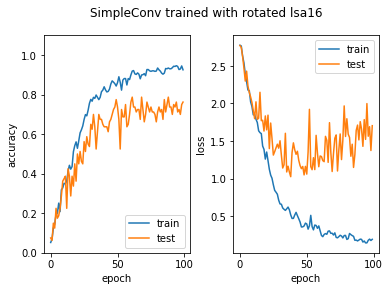

Testing both models on both datasets...


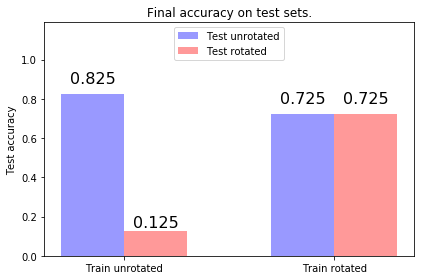

model_rotated_test_dataset score: loss=27.701829, accuracy=0.125000
model_rotated_train_dataset score: loss=24.551481, accuracy=0.175000
model_test_dataset score: loss=1.899186, accuracy=0.825000
model_train_dataset score: loss=0.000060, accuracy=1.000000
rotated_model_rotated_test_dataset score: loss=1.649778, accuracy=0.725000
rotated_model_rotated_train_dataset score: loss=0.142976, accuracy=0.945833
rotated_model_test_dataset score: loss=1.870143, accuracy=0.725000
rotated_model_train_dataset score: loss=0.173151, accuracy=0.929167


In [24]:
batch_size = 64

epochs={'cifar10':5,'mnist':2,'fashion_mnist':12,'cluttered_mnist':10,'lsa16':50,'mnist_rot':5,'pugeault':15}
from pytorch.experiment import rotation
rotated_epochs={'cifar10':100,'mnist':5,'fashion_mnist':60,'cluttered_mnist':30,'lsa16':100,'mnist_rot':5,'pugeault':40}

config=pytorch.experiment.rotation.TrainRotatedConfig(batch_size=batch_size,
                   epochs=epochs[dataset.name],rotated_epochs=rotated_epochs[dataset.name],
                   pre_rotated_epochs=0, optimizer=optimizer,rotated_optimizer=rotated_optimizer,
                  use_cuda=use_cuda)

scores=rotation.run(config,model,rotated_model,dataset,plot_accuracy=True,save_plots=False)
for k,v in scores.items():
    print('%s score: loss=%f, accuracy=%f' % (k,v[0],v[1]))


In [38]:
from pytorch.experiment import invariance
n_rotations=4
rotations=np.linspace(-180,180,n_rotations,endpoint=False)

rotated_invariance_measure,classes=invariance.run(rotated_model,dataset,config,rotations)



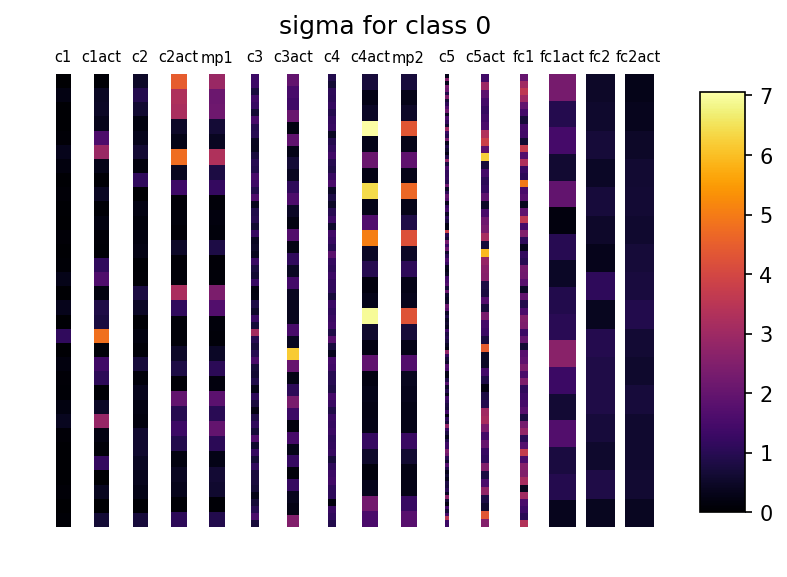

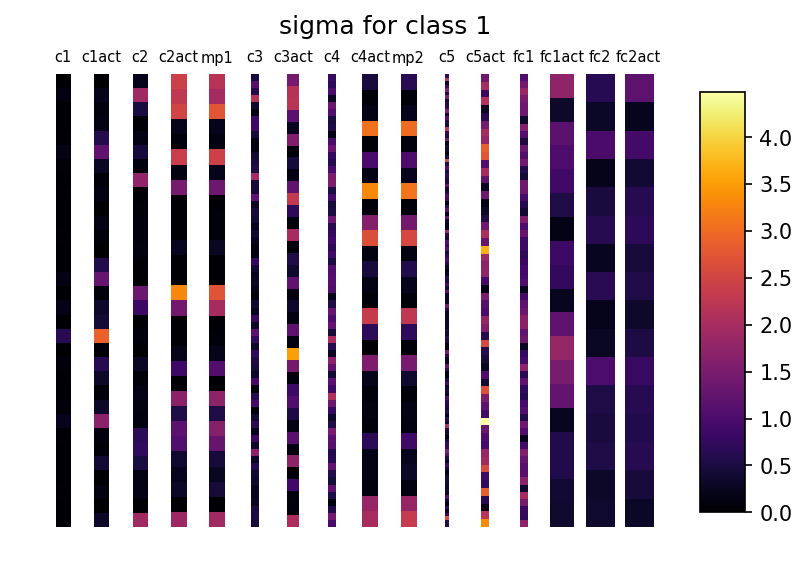

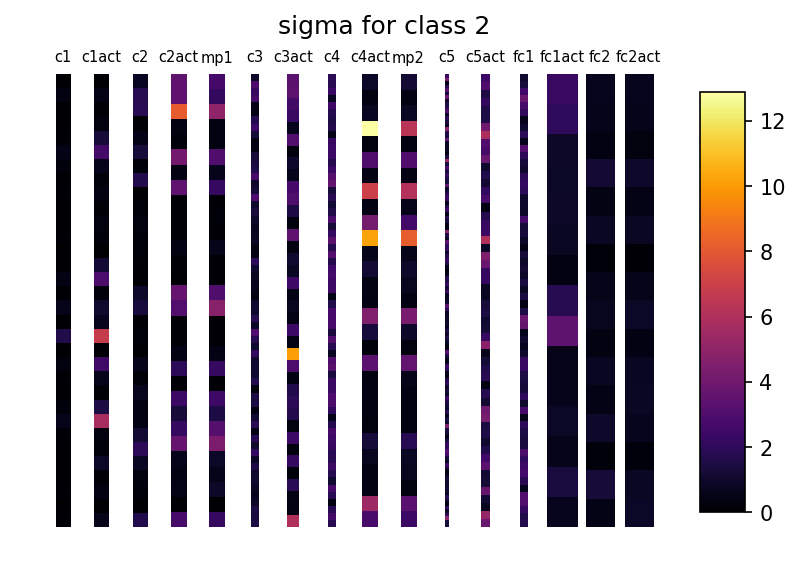

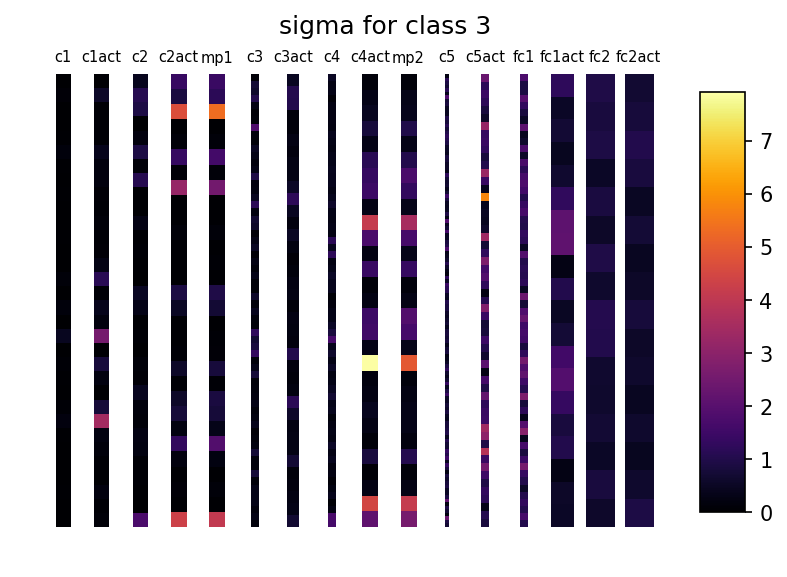

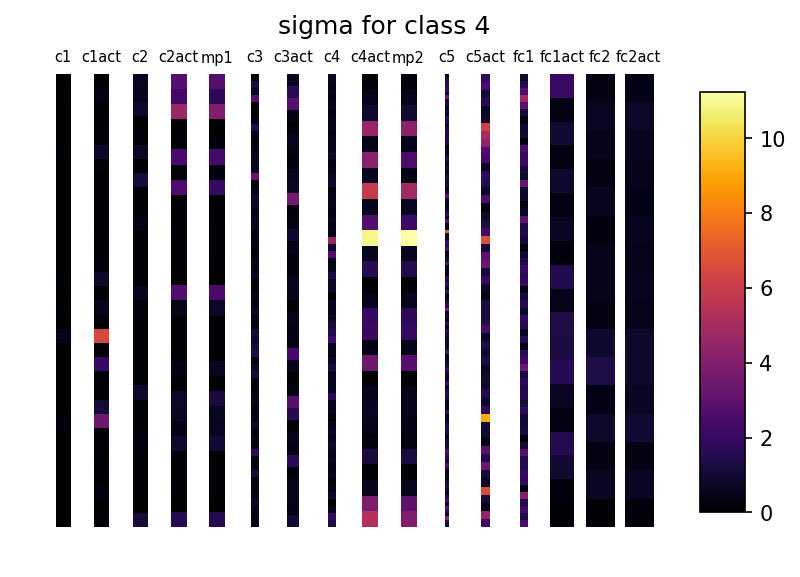

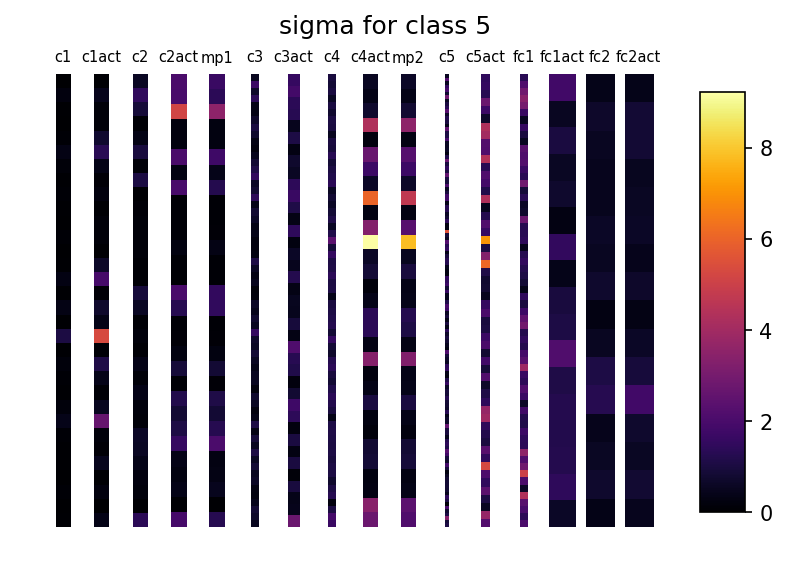

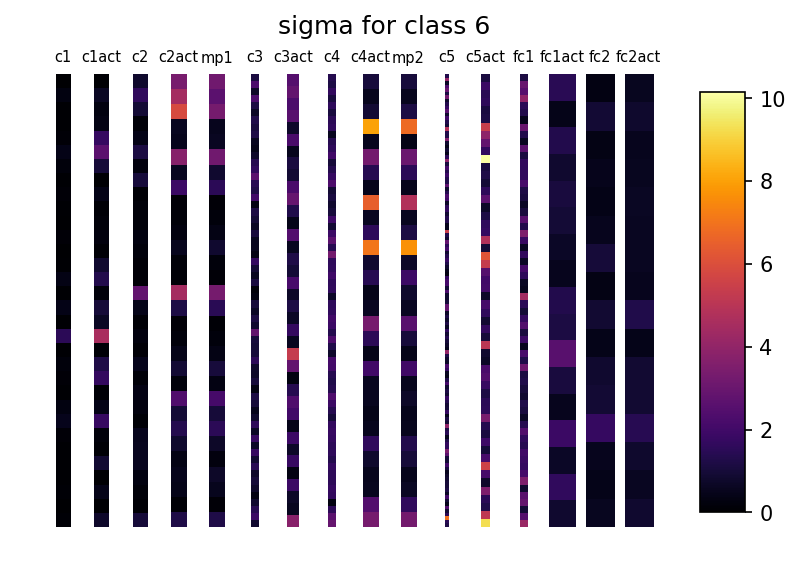

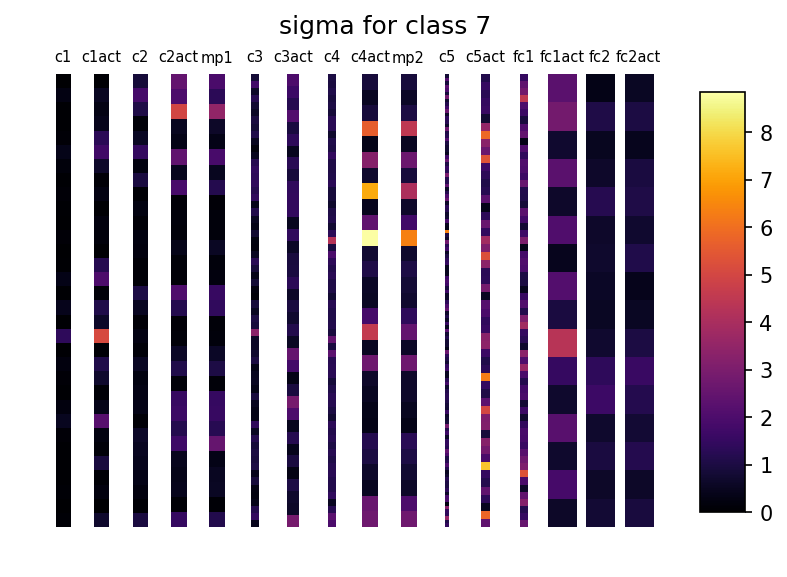

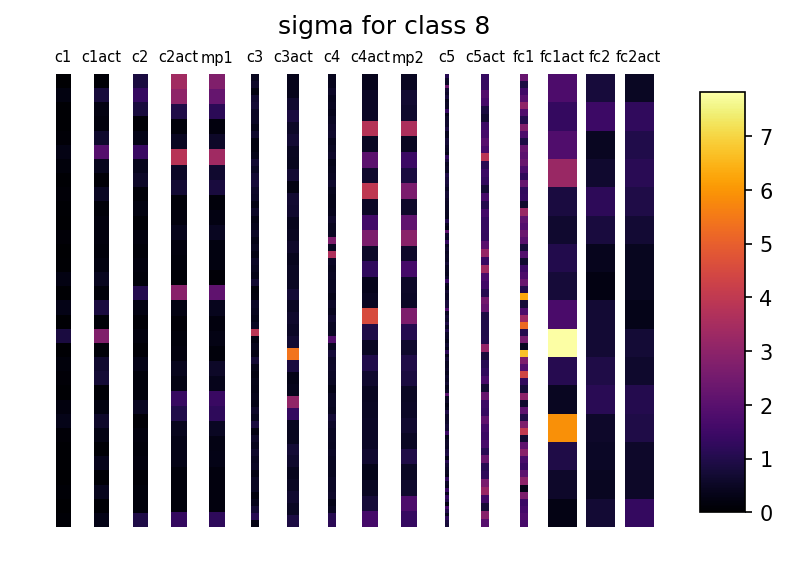

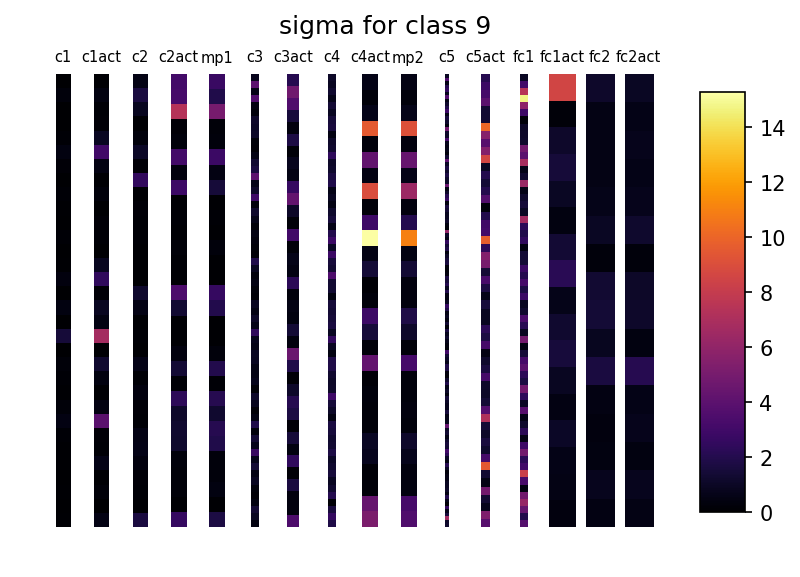

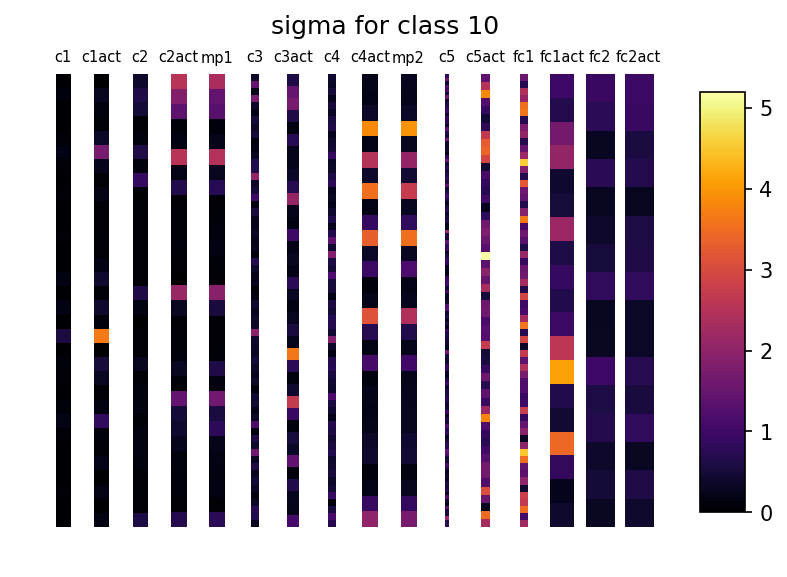

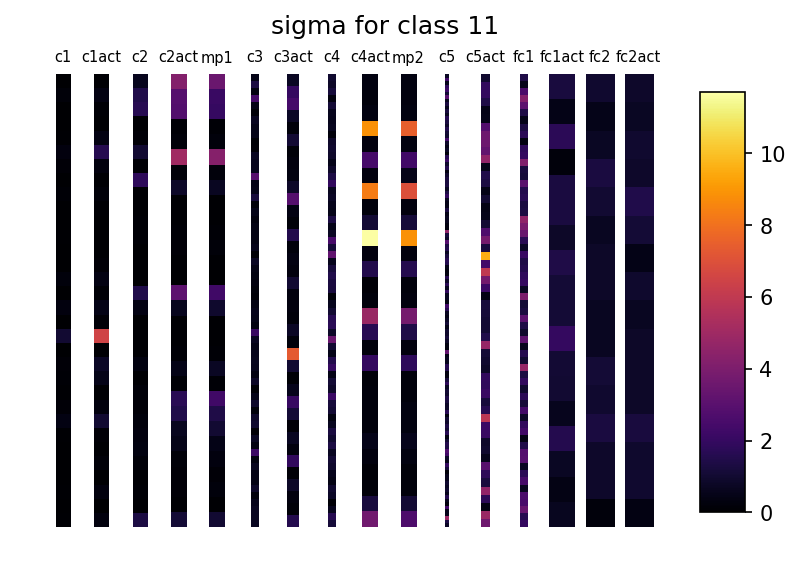

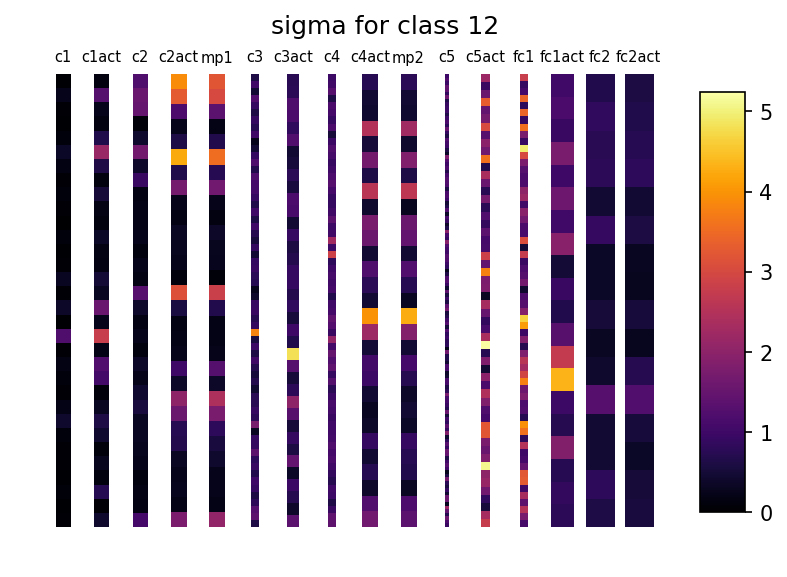

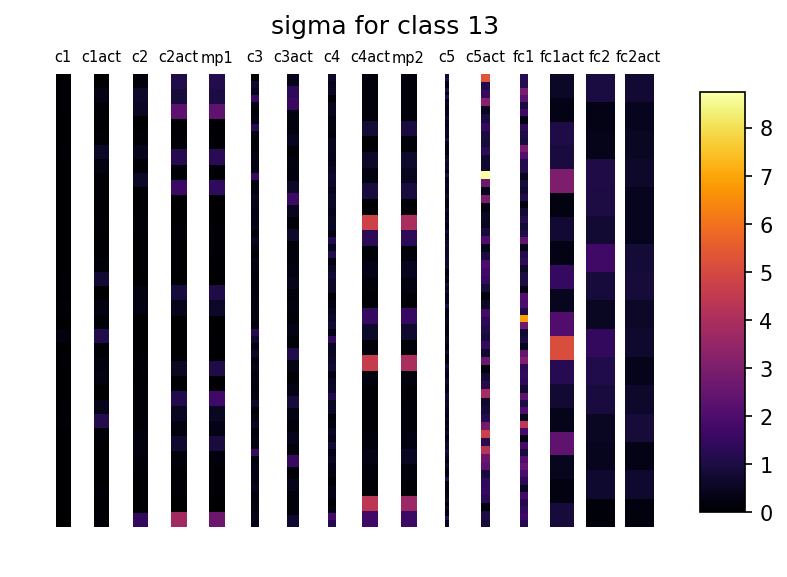

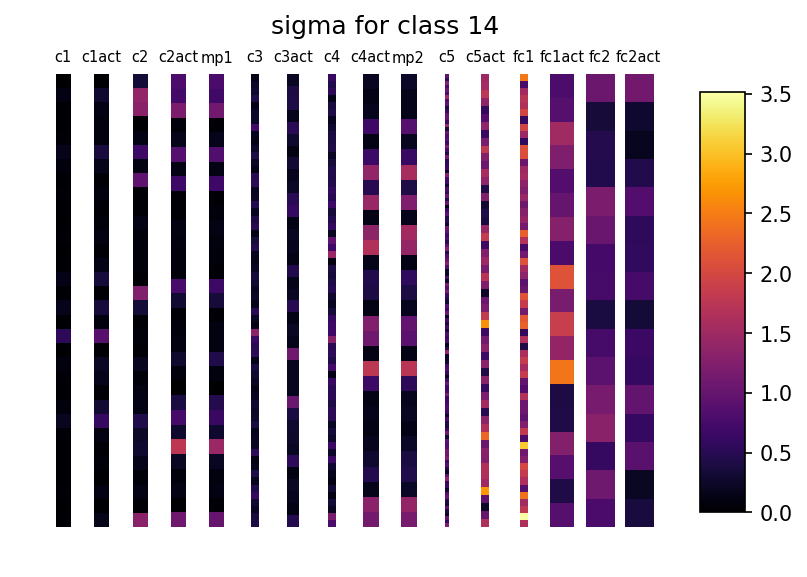

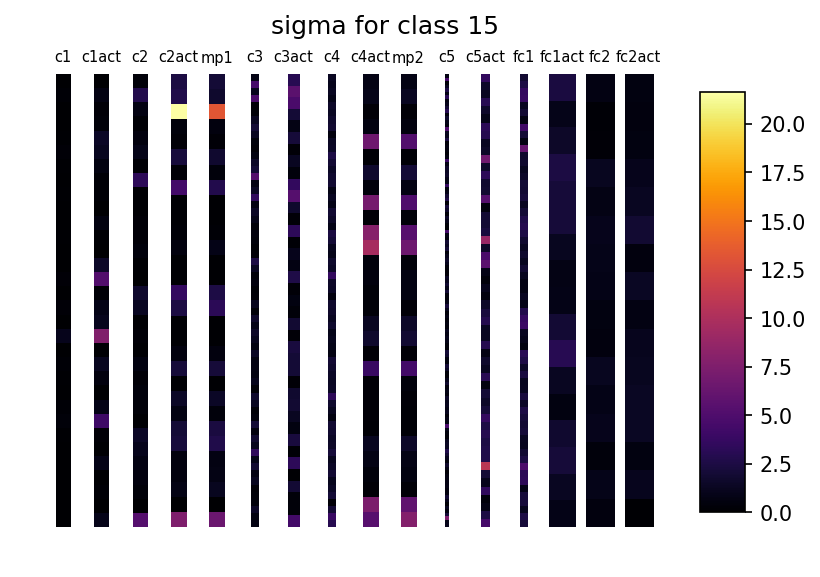

In [39]:
invariance.plot(rotated_invariance_measure,model,dataset.name,classes,savefig=True)



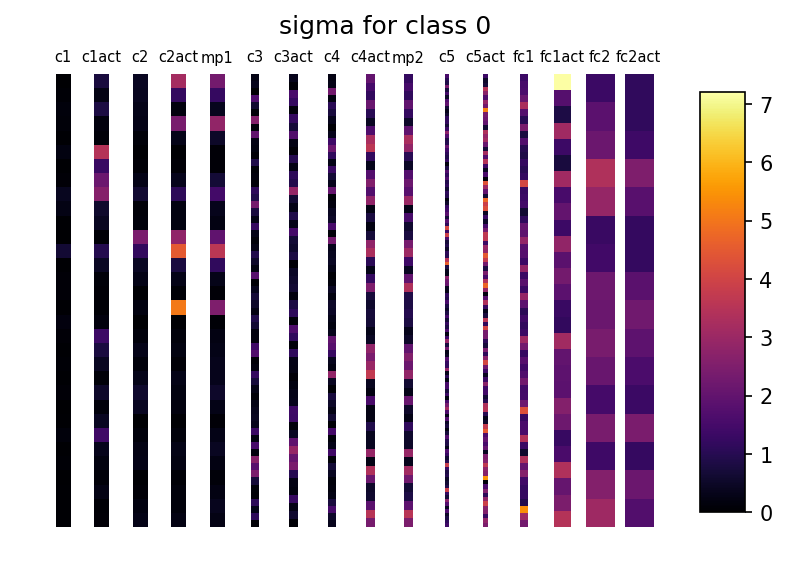

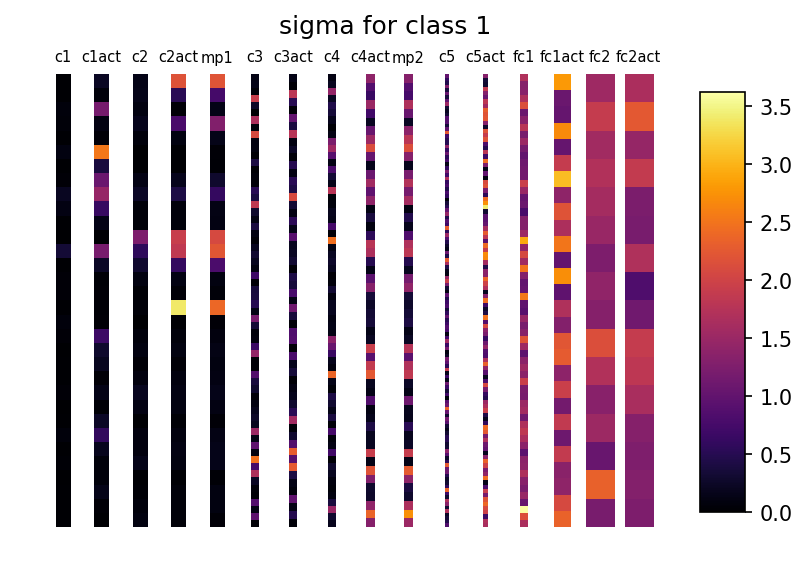

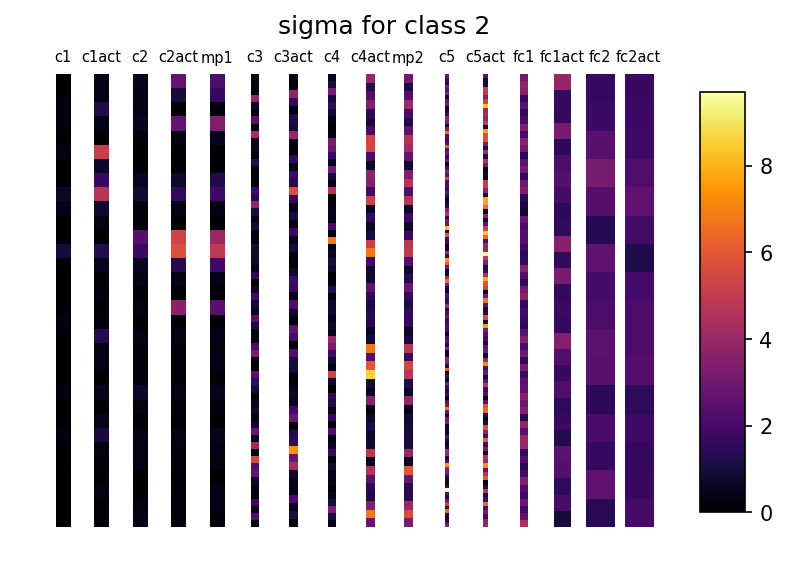

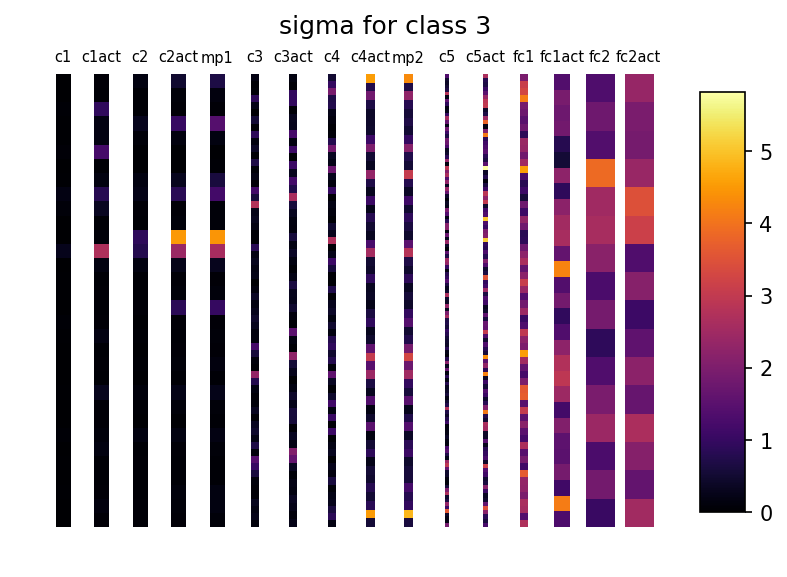

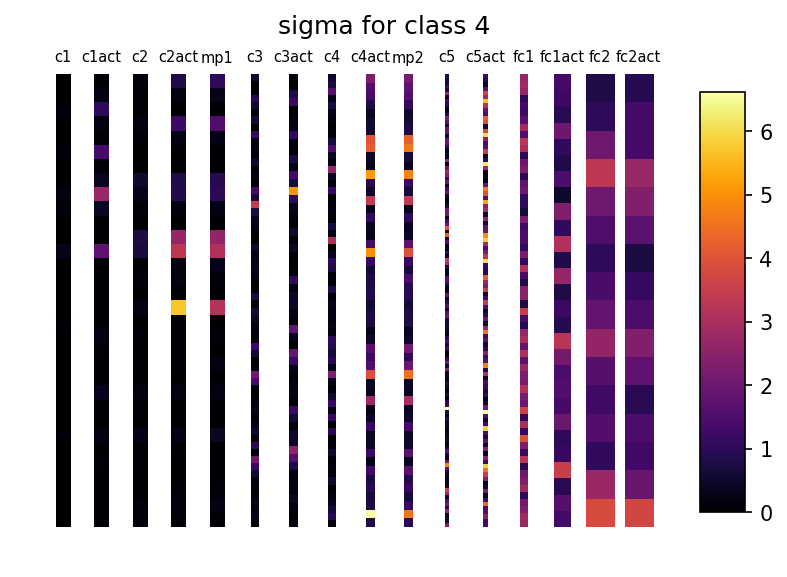

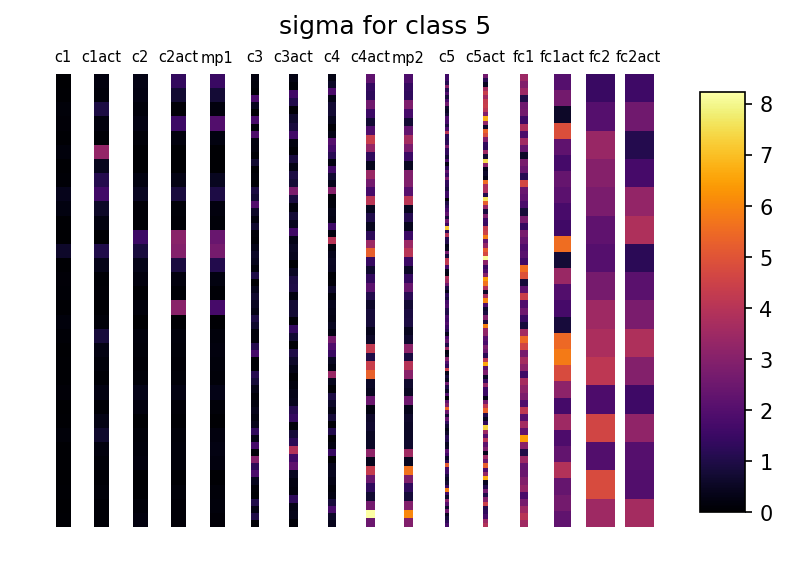

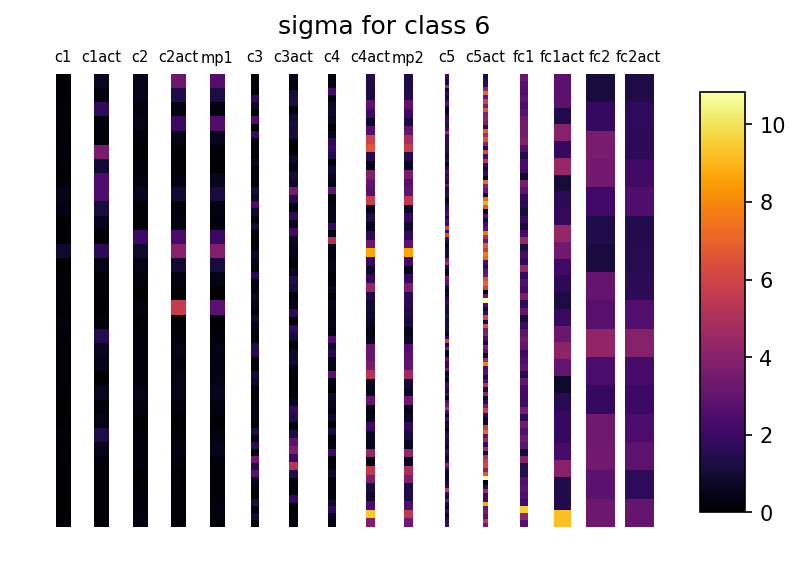

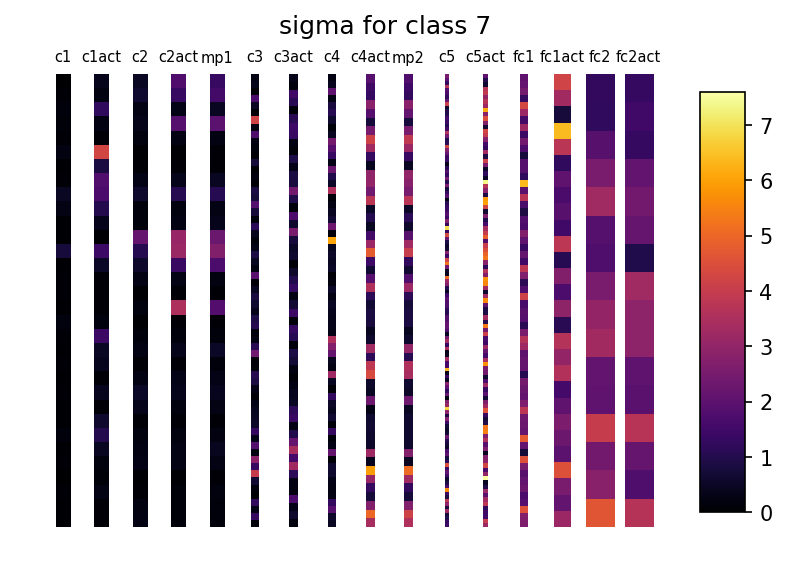

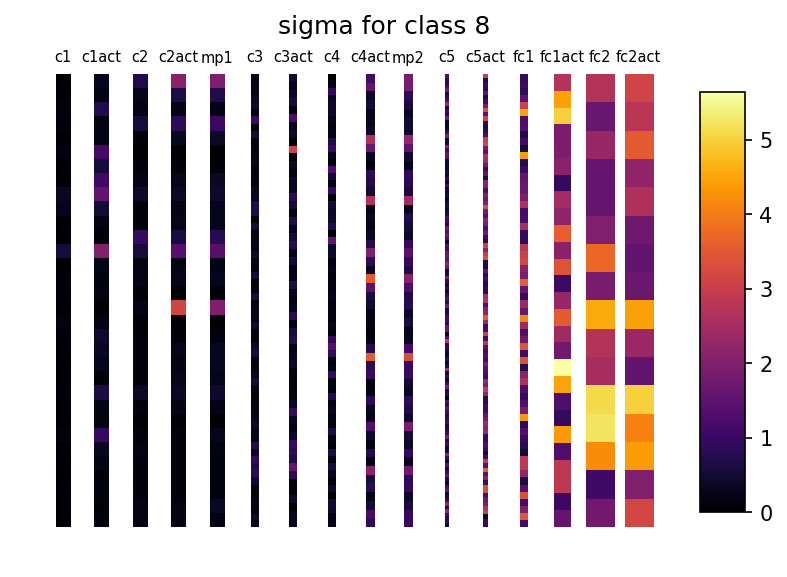

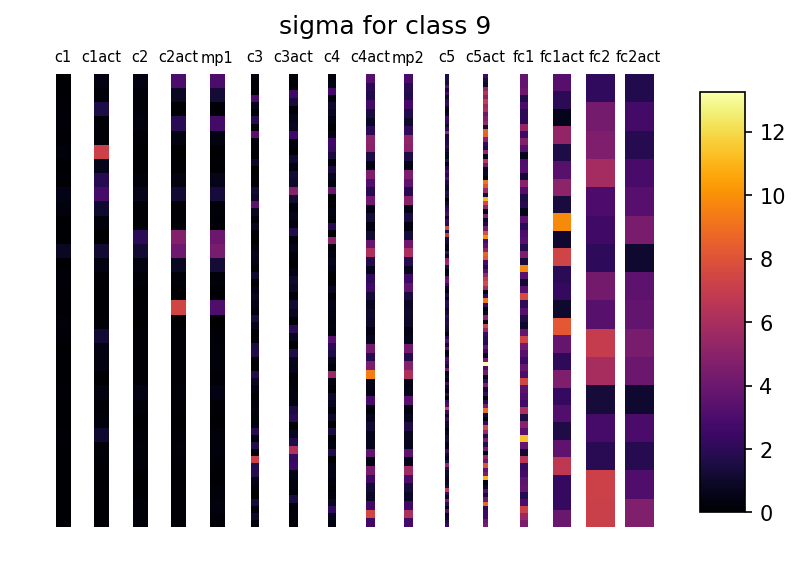

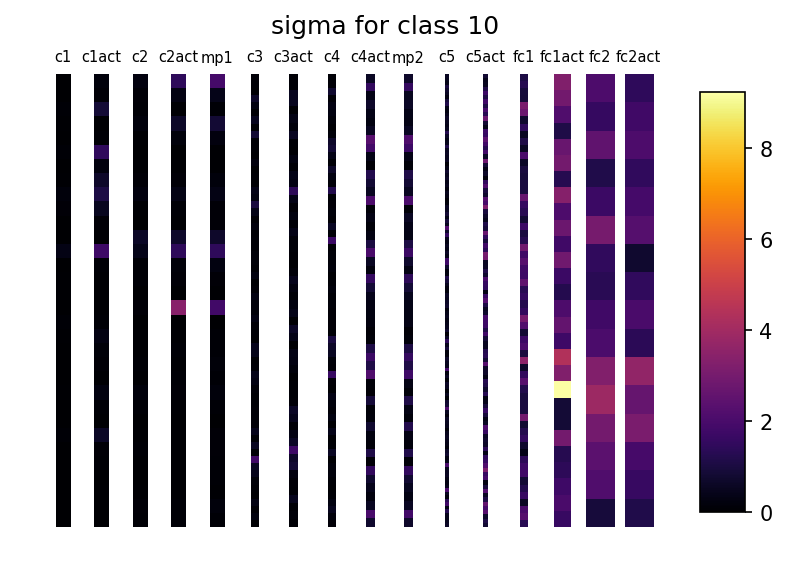

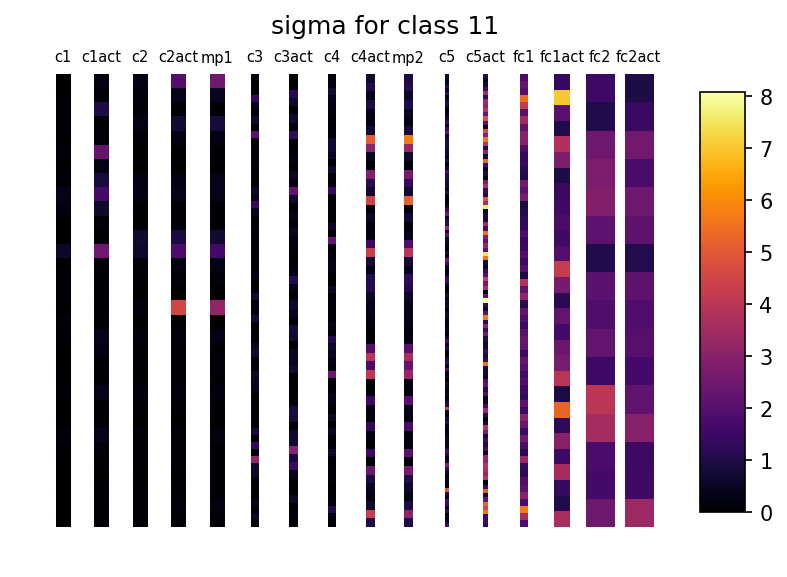

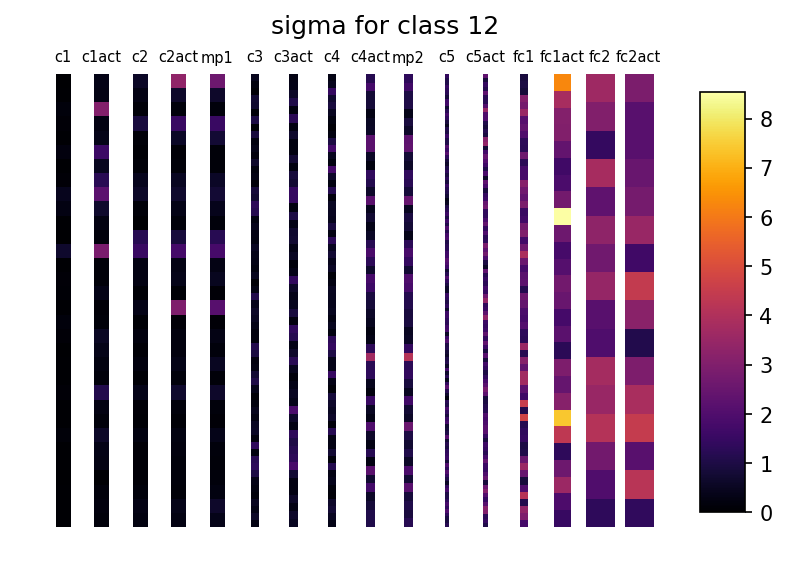

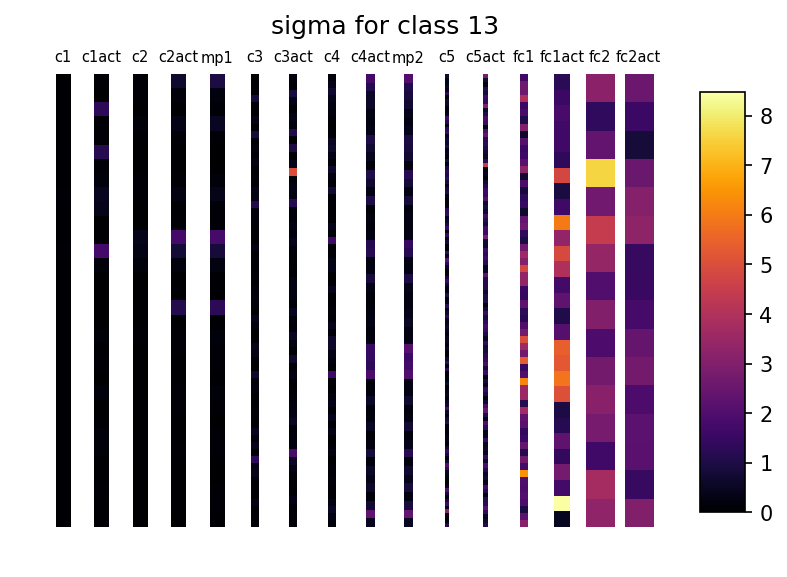

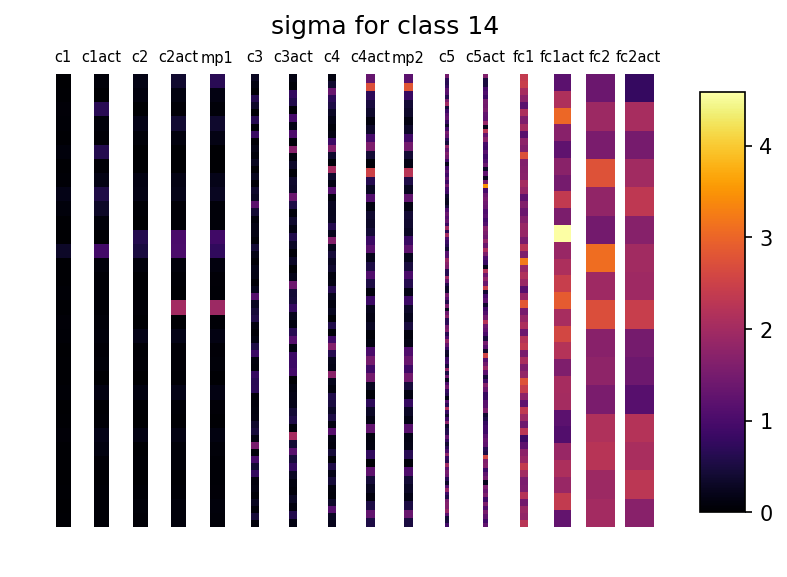

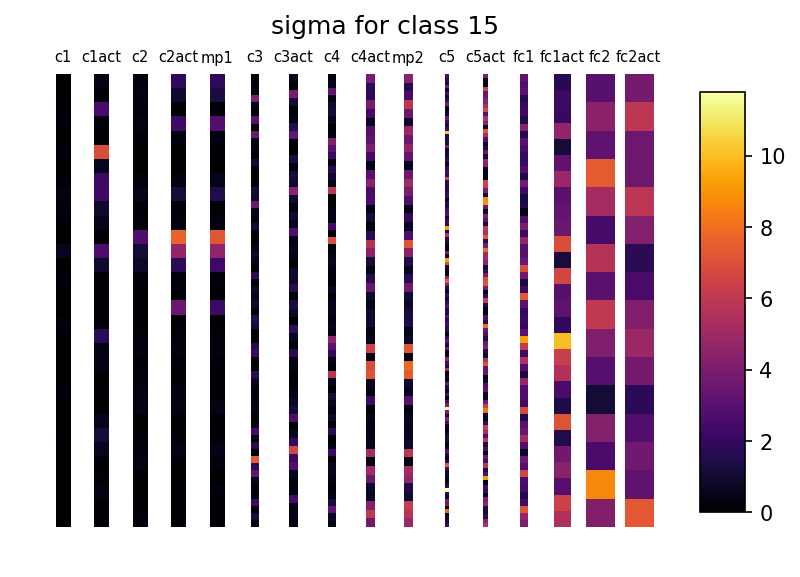

In [33]:
invariance_measure,classes=invariance.run(model,dataset,config,rotations)
invariance.plot(invariance_measure,model,dataset.name,classes,savefig=True)


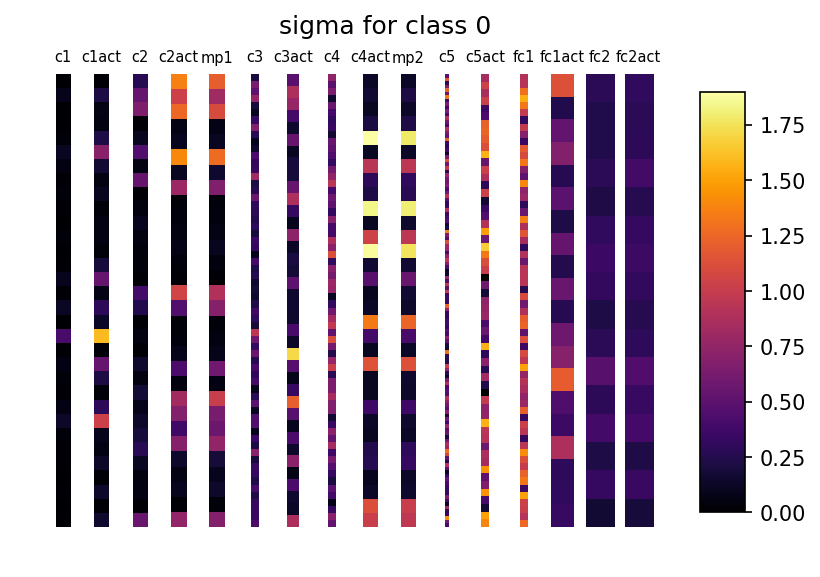

In [36]:
invariance_measure_all_dataset,classes=invariance.run_all_dataset(rotated_model,dataset,config,rotations)
invariance.plot(invariance_measure_all_dataset,rotated_model,dataset.name,classes,savefig=True)


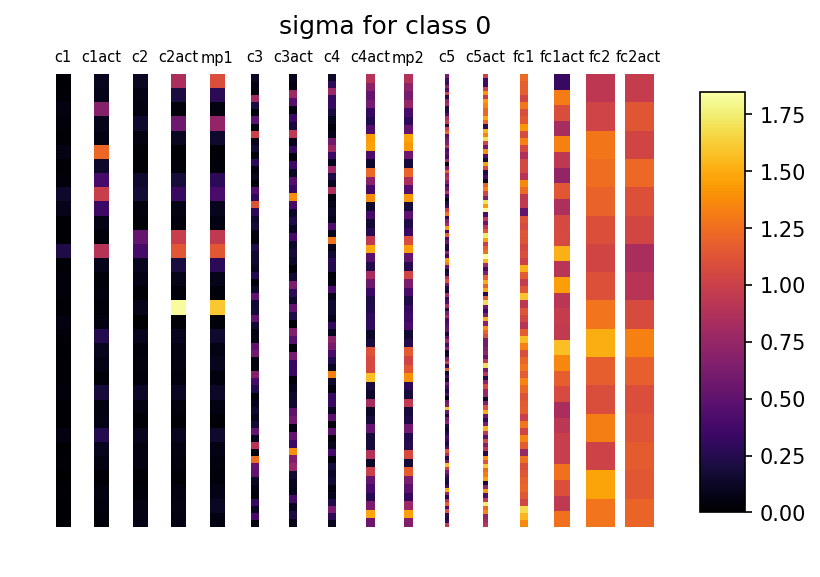

In [37]:
invariance_measure_all_dataset,classes=invariance.run_all_dataset(model,dataset,config,rotations)
invariance.plot(invariance_measure_all_dataset,model,dataset.name,classes,savefig=True)